# Building EO training/validation/testing datasets with the Sentinelhub API

#### The following modules/Libraries will be needed

In [2]:
from sentinelhub import BBox, CRS, DataCollection, SHConfig, WmsRequest, WcsRequest, DataSource, MimeType
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance
import rasterio
import numpy as np
import datetime

### Prerequisites

#### Sentinel Hub account

In order to use Sentinel Hub services you will need a Sentinel Hub account. If you do not have one yet, you can create a free trial account at [Sentinel Hub webpage](https://services.sentinel-hub.com/oauth/subscription). If you are a researcher you can even apply for a free non-commercial account at [ESA OSEO page](https://earth.esa.int/aos/OSEO).

Once you have the account set up, login to [Sentinel Hub Configurator](https://apps.sentinel-hub.com/configurator/). Inside there will already exist one configuration with an **instance ID** (alpha-numeric code of length 36). For this tutorial it is recommended that you create a new configuration (`"Add new configuration"`) and set the configuration to be based on **Python scripts template**. Such configuration will already contain all layers used in these examples. Otherwise you will have to define the layers for your  configuration yourself.

After you have decided which configuration to use, you have two options. You can either put configuration's **instance ID** into `sentinelhub` package's configuration file following the [configuration instructions](http://sentinelhub-py.readthedocs.io/en/latest/configure.html) or you can write it down in the following cell:

Generate a configuration:
This is done using the ID.
This is so that sentinelhub knows you are authorised to use their service, and which parts of the service you want to use.

In [3]:
INSTANCE_ID = '42345776-19b9-4c80-970d-893dea504aad'
if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

print(config)

{
  "instance_id": "42345776-19b9-4c80-970d-893dea504aad",
  "sh_client_id": "",
  "sh_client_secret": "",
  "sh_base_url": "https://services.sentinel-hub.com",
  "geopedia_wms_url": "https://service.geopedia.world",
  "geopedia_rest_url": "https://www.geopedia.world/rest",
  "aws_access_key_id": "",
  "aws_secret_access_key": "",
  "aws_metadata_url": "https://roda.sentinel-hub.com",
  "aws_s3_l1c_bucket": "sentinel-s2-l1c",
  "aws_s3_l2a_bucket": "sentinel-s2-l2a",
  "opensearch_url": "http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2",
  "max_wfs_records_per_query": 100,
  "max_opensearch_records_per_query": 500,
  "max_download_attempts": 4,
  "download_sleep_time": 5,
  "download_timeout_seconds": 120,
  "number_of_download_processes": 1
}


Define a region and a random test date 

WCS:  <sentinelhub.data_request.WcsRequest object at 0x7fb41875d0d0>
Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0

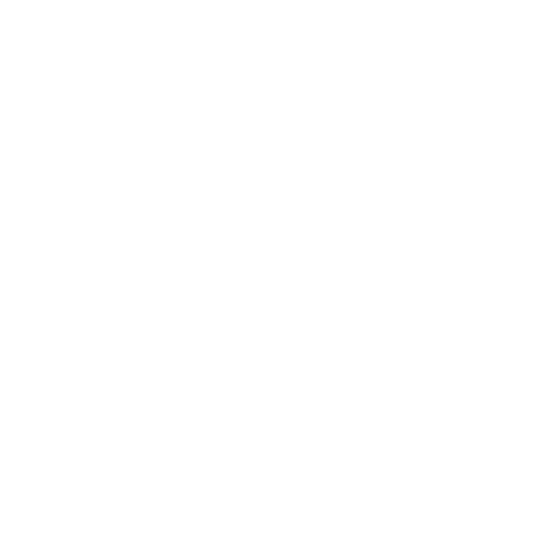

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]

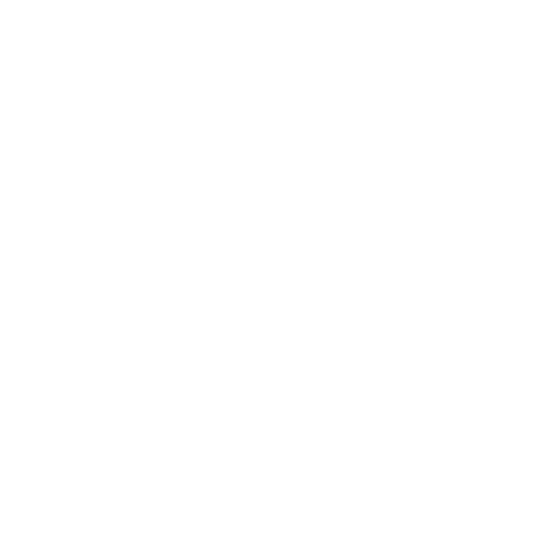

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 

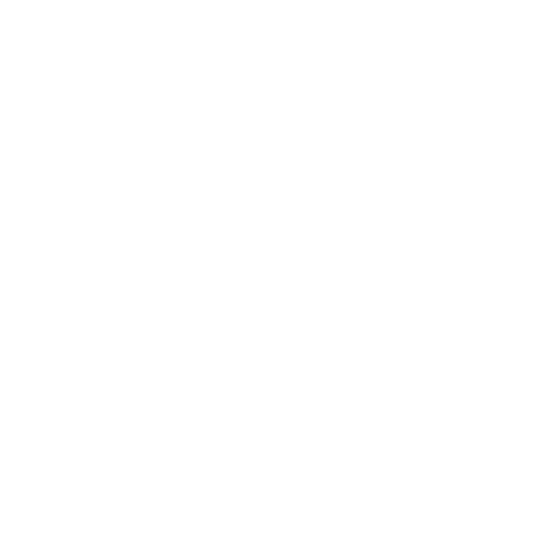

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0 

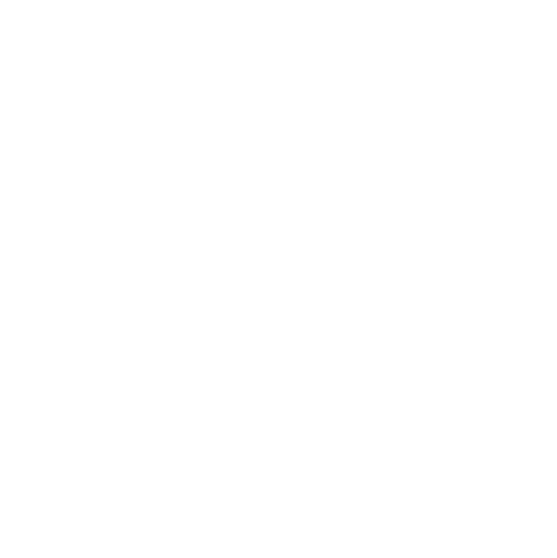

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]

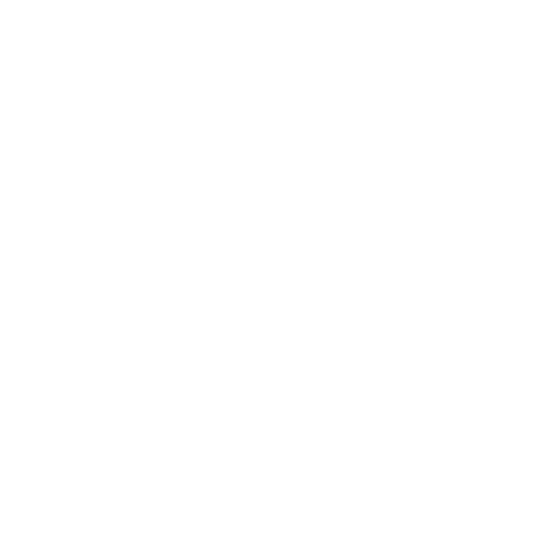

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]

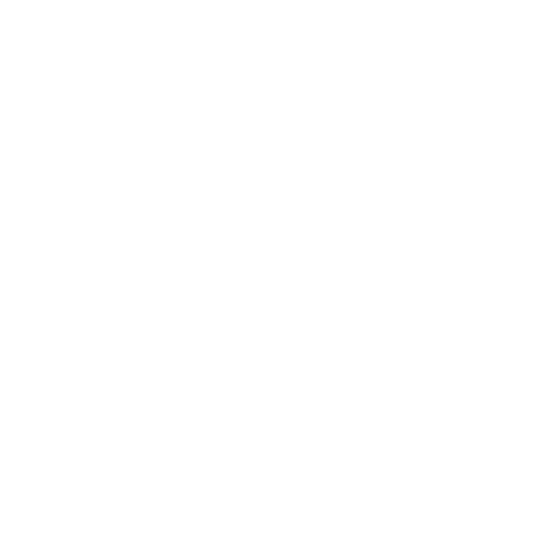

WCS:  <sentinelhub.data_request.WcsRequest object at 0x7fb3ea7a2ed0>
Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[240 242 245 255]
 [240 242 245 255]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0

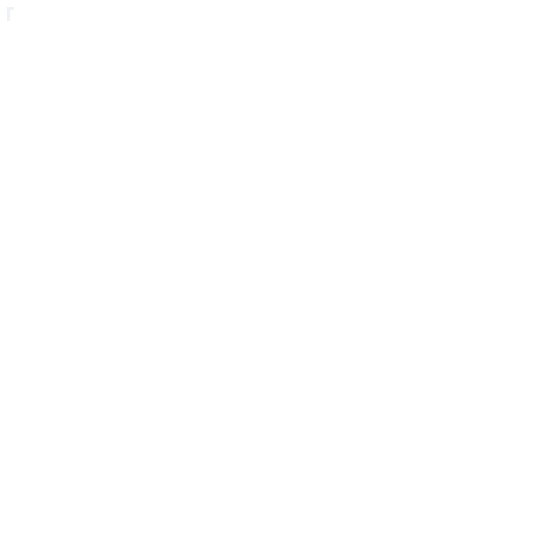

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]

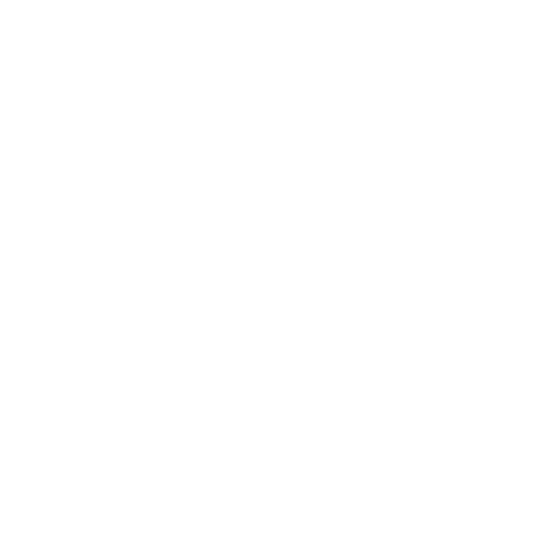

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[  6  19  26 255]
 [ 10  24  32 255]
 [ 21  29  47 255]
 [ 24  44  73 255]
 [ 37  74 115 255]
 [ 43  93 141 255]
 [ 34  81 102 255]
 [ 60 109 167 255]
 [ 84 153 231 255]
 [ 77 148 214 255]
 [ 75 132 210 255]
 [ 75 140 213 255]
 [ 82 161 229 255]
 [ 76 137 201 255]
 [ 69 133 192 255]
 [ 82 150 229 255]
 [ 75 141 217 255]
 [ 55 118 164 255]
 [ 55 108 159 255]
 [ 39  63 109 255]
 [  8  20  35 255]
 [  6  16  25 255]
 [  2  16  32 255]
 [  5  12  29 255]
 [ 15  44  70 255]
 [ 34  73 105 255]
 [ 46  84 132 255]
 [ 10  43  63 255]
 [  3  11  20 255]
 [  3  10  19 255]
 [  8   9  25 255]
 [  9  12  24 255]
 [  5  14  24 255]
 [  6  13  26 255]
 [  6  15  23 255]
 [  5  16  24 255]
 [  4  26  31 255]
 [  4  21  28 255]
 [  2  12  22 255]
 [  6  18  31 255]
 [ 10  20  44 255]
 [  7   9  26 255]
 [  5   9  26 255]
 [  4  14  22 255]
 [  1   8 

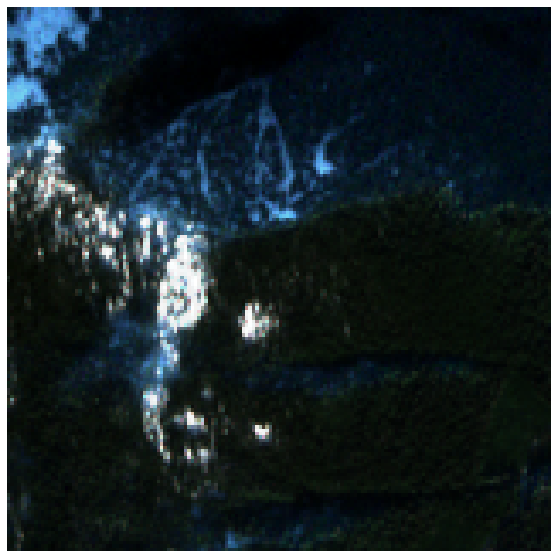

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[ 31  64 111 255]
 [ 31  47  89 255]
 [ 31  47  88 255]
 [ 37  65 103 255]
 [ 43  71 117 255]
 [ 50  83 135 255]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0 

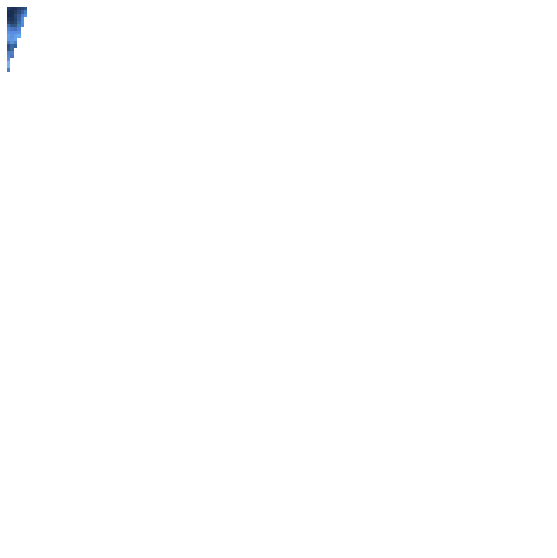

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[ 73  94 110 255]
 [ 62  93  99 255]
 [ 58  81  99 255]
 [ 58  78  96 255]
 [ 52  78  99 255]
 [ 59  91 124 255]
 [ 62  97 136 255]
 [ 59  91 137 255]
 [ 84 135 186 255]
 [115 178 235 255]
 [132 199 238 255]
 [158 221 240 255]
 [178 236 242 255]
 [205 239 246 255]
 [233 240 247 255]
 [235 241 248 255]
 [219 239 246 255]
 [194 237 243 255]
 [180 236 241 255]
 [141 208 237 255]
 [ 88 124 157 255]
 [ 61  75 100 255]
 [ 57  82 102 255]
 [ 54  78  99 255]
 [ 65  91 122 255]
 [ 89 135 183 255]
 [111 173 229 255]
 [ 83 126 178 255]
 [ 49  73  89 255]
 [ 44  67 105 255]
 [ 49  71  91 255]
 [ 50  73  95 255]
 [ 52  74 115 255]
 [ 49  70 102 255]
 [ 51  80  99 255]
 [ 55  78 105 255]
 [ 56  75  97 255]
 [ 58  85 106 255]
 [ 65  91 114 255]
 [ 73 109 126 255]
 [103 126 162 255]
 [ 75  99 126 255]
 [ 49  59  84 255]
 [ 43  65  79 255]
 [  0   0 

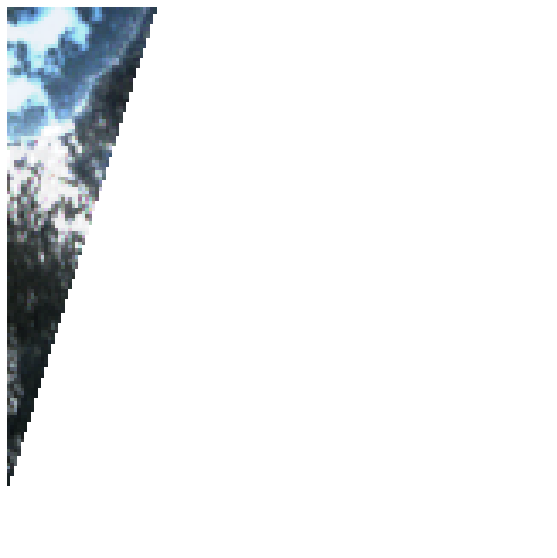

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [253 249 251 255]
 [249 250 253 255]
 [249 254 255 255]
 [250 254 255 255]
 [250 253 255 255]
 [248 252 255 255]
 [246 248 252 255]
 [249 254 255 255]
 [245 250 251 255]
 [245 246 247 255]
 [241 243 245 255]
 [243 245 

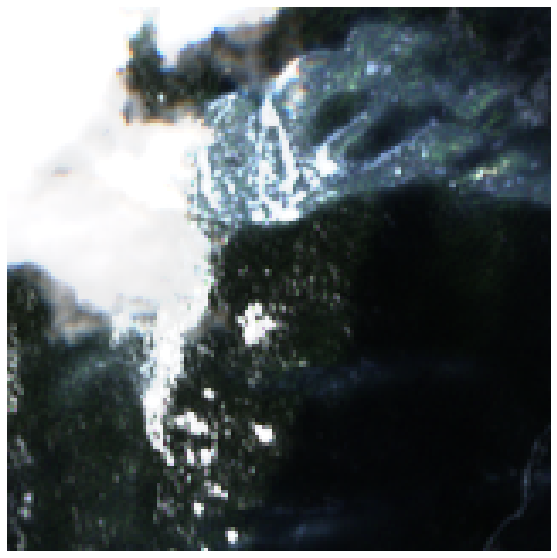

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]

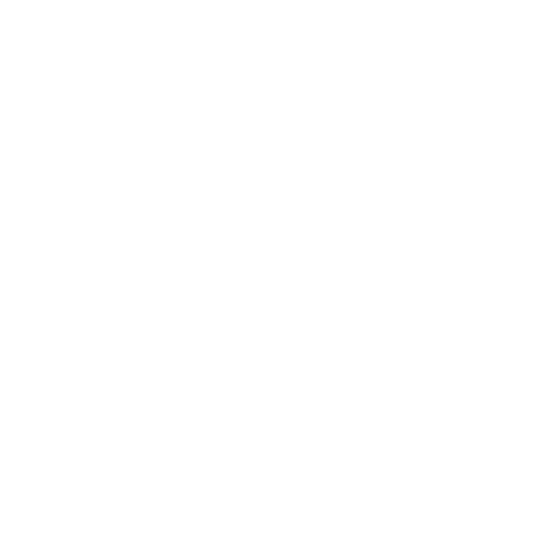

WCS:  <sentinelhub.data_request.WcsRequest object at 0x7fb4187c0e90>
Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[  8   7   0 255]
 [  4  13   0 255]
 [  5   8   0 255]
 [  1   4   5 255]
 [  4   7   0 255]
 [ 11   5   0 255]
 [  8   3   0 255]
 [  9   3   0 255]
 [ 11   6   0 255]
 [ 11   9   2 255]
 [ 11   9   6 255]
 [  8   7   4 255]
 [  4   8   4 255]
 [  9   6   2 255]
 [ 10   7   2 255]
 [  9  12   7 255]
 [ 10   8   8 255]
 [ 12   4   3 255]
 [ 10   8   1 255]
 [ 10   8   0 255]
 [  9   9   0 255]
 [ 12   9   0 255]
 [  7   9   0 255]
 [  4   6   3 255]
 [  5   1   3 255]
 [  9   4   1 255]
 [  8   7   3 255]
 [  7   8   8 255]
 [  9  10  10 255]
 [  6  12   5 255]
 [  5  11   0 255]
 [  7   8   0 255]
 [  4   7   2 255]
 [  5   7   2 255]
 [ 10  13   3 255]
 [  6   9   5 255]
 [  3   6   6 255]
 [  5  11   1 255]
 [  2  13   8 255]
 [  5  12   9 255]
 [  6   8   0 255

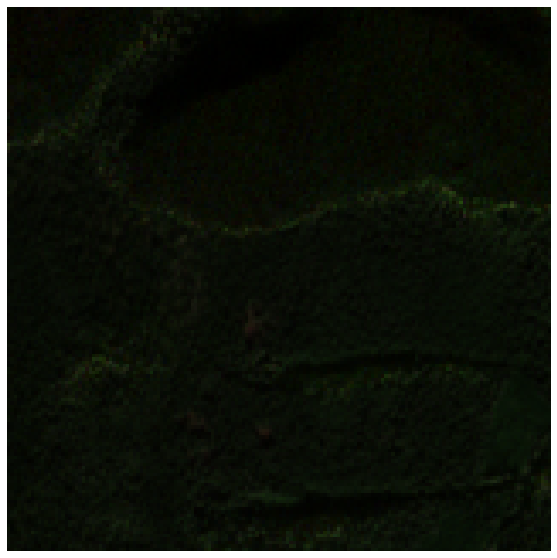

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[  8   8   0 255]
 [  4  14   0 255]
 [  4   9   0 255]
 [  2   4   7 255]
 [  4   9   2 255]
 [ 11   6   0 255]
 [  8   3   1 255]
 [  9   4   0 255]
 [ 11   7   0 255]
 [ 11  10   5 255]
 [ 11  10   8 255]
 [  8   8   6 255]
 [  4  10   6 255]
 [  9   7   4 255]
 [ 10   9   5 255]
 [  9  13   9 255]
 [ 10   9  10 255]
 [ 12   6   6 255]
 [ 11  10   3 255]
 [ 10   9   0 255]
 [ 10  11   2 255]
 [ 12  11   0 255]
 [  7  11   0 255]
 [  5   7   5 255]
 [  6   2   5 255]
 [  9   5   4 255]
 [  8   8   6 255]
 [  7   9  11 255]
 [  9  12  13 255]
 [  6  13   8 255]
 [  5  13   3 255]
 [  7   9   2 255]
 [  4   9   5 255]
 [  5   8   5 255]
 [ 11  15   6 255]
 [  6  11   8 255]
 [  4   8   9 255]
 [  5  12   5 255]
 [  3  15  11 255]
 [  6  14  12 255]
 [  6  10   3 255]
 [  6  11   6 255]
 [ 11  18  12 255]
 [ 15  19   9 255]
 [ 11  18 

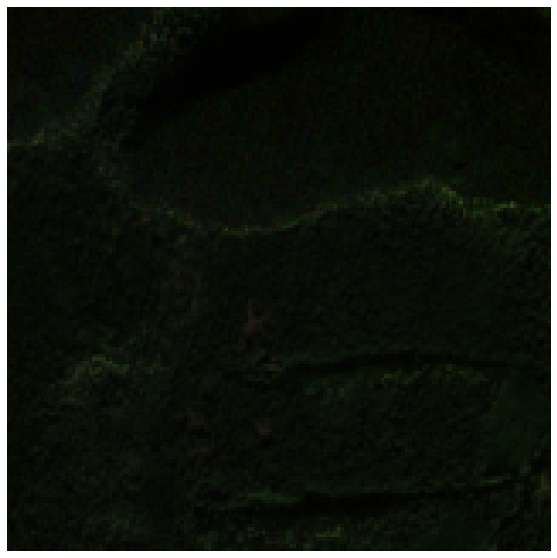

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[  1   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  4   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  2   0   0 255]
 [  0   0   0 255]
 [  0   2   0 255]
 [  1   1   0 255]
 [  0   1   0 255]
 [  1   0   0 255]
 [  0   3   0 255]
 [  0   1   0 255]
 [  1   2   0 255]
 [  0   0   0 255]
 [  1   0   0 255]
 [  0   0   0 255]
 [  0   8   0 255]
 [  0   3   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   1   0 255]
 [  0   0   0 255]
 [  0   1   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   2   0 255]
 [  0   2   0 255]
 [  0   3   0 255]
 [  1   0   0 255]
 [  3   0   0 255]
 [  0   1   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   3   0 255]
 [  0   3   0 255]
 [  1   0   0 255]
 [  5   2   0 255]
 [  5  13   0 255]
 [  8  10 

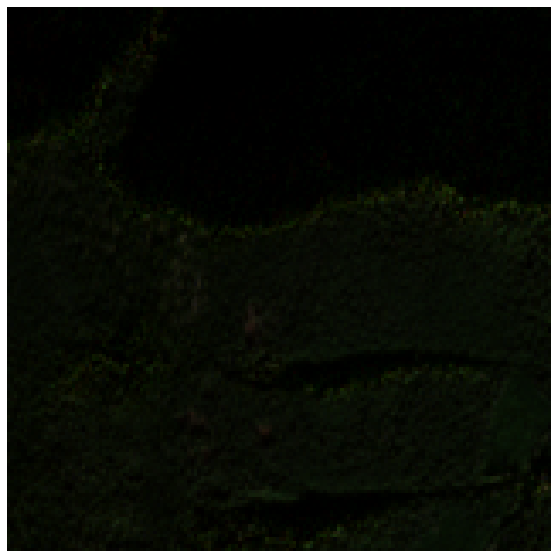

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[  1   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  3   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  2   1   0 255]
 [  0   0   0 255]
 [  0   2   0 255]
 [  1   2   0 255]
 [  0   1   0 255]
 [  1   0   0 255]
 [  0   3   0 255]
 [  0   2   0 255]
 [  1   2   0 255]
 [  0   0   0 255]
 [  1   0   0 255]
 [  0   0   0 255]
 [  0   9   0 255]
 [  0   4   0 255]
 [  0   0   0 255]
 [  0   1   0 255]
 [  0   2   0 255]
 [  0   0   0 255]
 [  0   2   0 255]
 [  0   1   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   3   0 255]
 [  0   3   0 255]
 [  0   4   0 255]
 [  1   0   0 255]
 [  3   0   0 255]
 [  0   2   0 255]
 [  0   1   0 255]
 [  0   1   0 255]
 [  0   4   0 255]
 [  0   4   0 255]
 [  1   1   0 255]
 [  5   2   0 255]
 [  5  13   0 255]
 [  8  11 

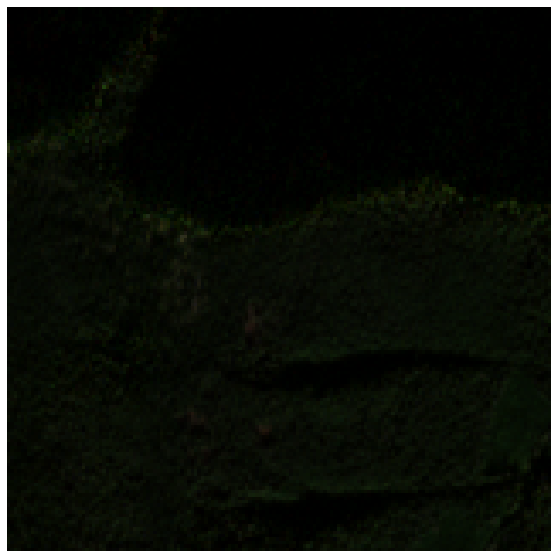

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[  1   0   7 255]
 [  0   0   4 255]
 [  0   0  10 255]
 [  0   0   6 255]
 [  0   0   4 255]
 [  1   0   5 255]
 [  0   0   5 255]
 [  0   0  12 255]
 [  4   2  10 255]
 [  0   0  16 255]
 [  3   0  19 255]
 [  4   2  12 255]
 [  1   2  13 255]
 [  1   1   9 255]
 [  0   0  12 255]
 [  4   3  13 255]
 [  5   5  15 255]
 [  0   0  15 255]
 [  1   3  11 255]
 [  0   0  14 255]
 [  0   0   5 255]
 [  0   0   5 255]
 [  0   0   5 255]
 [  0   0   4 255]
 [  0   0   6 255]
 [  2   0   9 255]
 [  4   4  11 255]
 [  2   7   7 255]
 [  1   1   2 255]
 [  0   0   8 255]
 [  3   0  10 255]
 [  2   2  13 255]
 [  1   2  11 255]
 [  0   0  11 255]
 [  6   2  17 255]
 [  0   2  10 255]
 [  1   3   8 255]
 [  0   0   7 255]
 [  5   1  14 255]
 [  1   2  12 255]
 [  0   1  14 255]
 [  0   4   8 255]
 [  0   0  10 255]
 [  1   0   9 255]
 [  1   2 

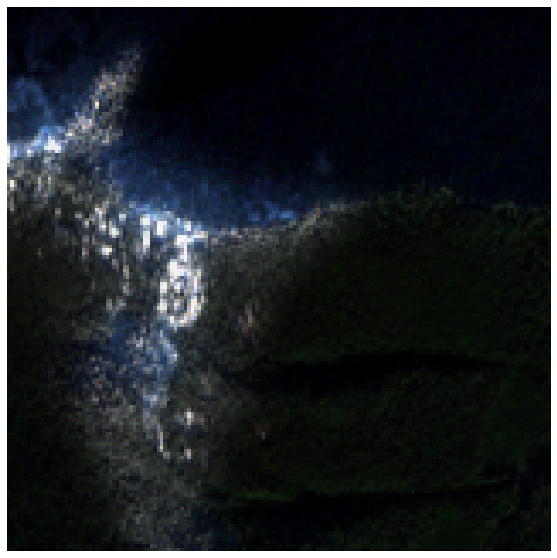

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[  0   0   6 255]
 [  0   0   4 255]
 [  0   0  10 255]
 [  0   0   6 255]
 [  0   0   4 255]
 [  0   0   4 255]
 [  0   0   5 255]
 [  0   0  12 255]
 [  3   1  10 255]
 [  0   0  16 255]
 [  1   0  19 255]
 [  3   1  12 255]
 [  0   1  13 255]
 [  0   0   9 255]
 [  0   0  12 255]
 [  2   2  13 255]
 [  3   4  14 255]
 [  0   0  15 255]
 [  0   2  11 255]
 [  0   0  14 255]
 [  0   0   6 255]
 [  0   0   6 255]
 [  0   0   5 255]
 [  0   0   5 255]
 [  0   0   7 255]
 [  1   0  10 255]
 [  2   3  12 255]
 [  1   7   8 255]
 [  0   0   2 255]
 [  0   0   8 255]
 [  2   0  11 255]
 [  1   1  14 255]
 [  0   1  12 255]
 [  0   0  12 255]
 [  5   1  18 255]
 [  0   1  10 255]
 [  0   2   8 255]
 [  0   0   8 255]
 [  4   1  15 255]
 [  0   2  13 255]
 [  0   0  14 255]
 [  0   3   9 255]
 [  0   0  11 255]
 [  0   0   9 255]
 [  0   1 

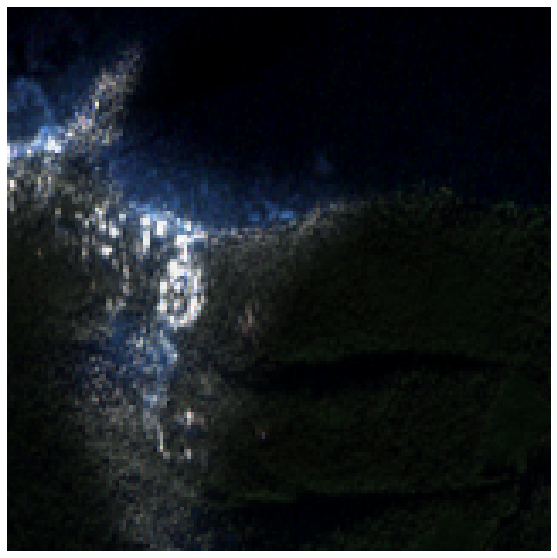

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[ 11   6   0 255]
 [  6   6   2 255]
 [  5   2   0 255]
 [  4   3   0 255]
 [  8   0   6 255]
 [  4  13   6 255]
 [  0   7   4 255]
 [  9   8  10 255]
 [ 15  16  14 255]
 [ 12   7  14 255]
 [  7  11  13 255]
 [ 11  12  12 255]
 [ 12  18  15 255]
 [ 12  19  12 255]
 [ 10  18   9 255]
 [ 16  18  11 255]
 [ 17  13  10 255]
 [  8   5   8 255]
 [  8  10   4 255]
 [  7  10   2 255]
 [  7   4   2 255]
 [  4   3   0 255]
 [  5   3   3 255]
 [  4   3   5 255]
 [  5   5   9 255]
 [  9   7   0 255]
 [ 12   7  14 255]
 [ 10   8   7 255]
 [  9   8   1 255]
 [  2   5   3 255]
 [  0   4   4 255]
 [  7   4   6 255]
 [  9   5   0 255]
 [  8   5   8 255]
 [  8   7   9 255]
 [  7   9   2 255]
 [  4  10   0 255]
 [  8   5   4 255]
 [  8   2   7 255]
 [  7   5   0 255]
 [  8   3   2 255]
 [  5   0   9 255]
 [  3   3   4 255]
 [  6   7   0 255]
 [  4   4 

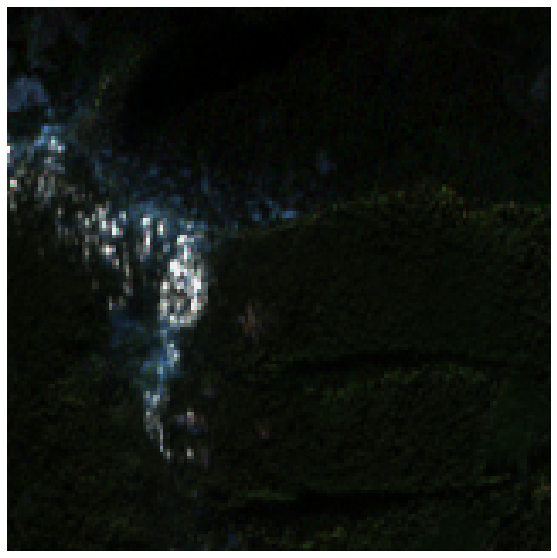

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]

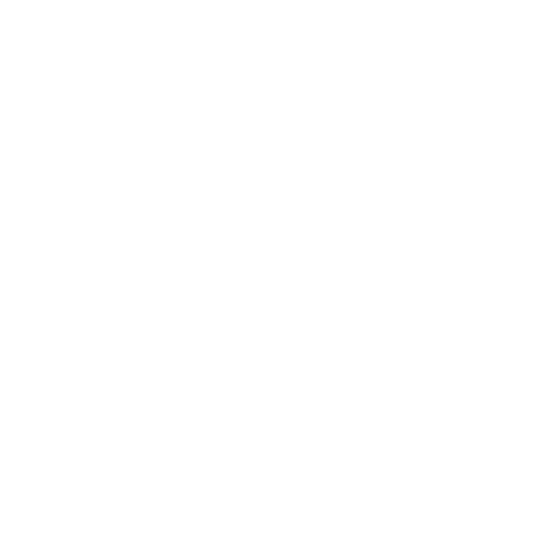

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (160, 160, 4)
SAT IMG [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]

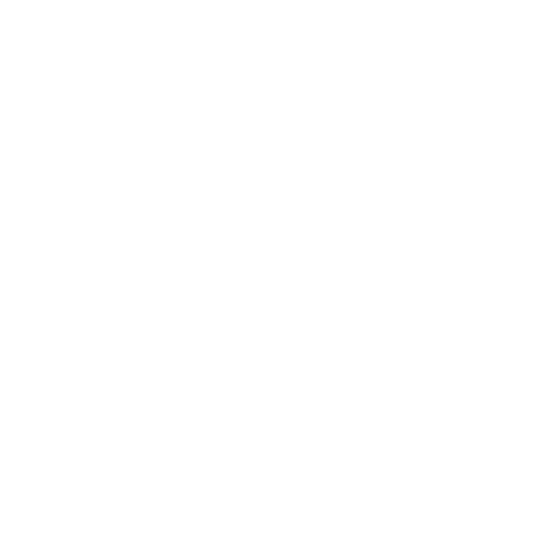

Returned data is of type = <class 'list'> and length 0.


IndexError: list index out of range

In [45]:
class SentinelData:
    """
    Retreiveing Sentinel data from Sentinel Hub
    initialise class with coordinates list, resolution, bounding box coordinates, years and month ranges
    make a wcs request for data between November-April
    """
    def __init__(self, coords_list, years, day_month_to, day_month_from):
        self.coords_list = coords_list
        self.resolution = '10m'
        self.area_coords = BBox(bbox=self.coords_list, crs=CRS.WGS84)
        self.year_range = years # make a set of years to iterate over 
        self.day_month_to = day_month_to
        self.day_month_from = day_month_from
        
        
        
    def get_data(self):
        """ 
        Create a bounding box and assign CRS. 
        Create a wcs data request from Sentinel for Sentinel-2 data. 
        Define max clouds as 20%
        """
        for year in self.year_range:
            time_from = "{}-{}".format(year, self.day_month_from)
            #print("time_from", time_from)
            time_to = "{}-{}".format(year + 1,  self.day_month_to)
            #print("time_to", time_to)
            # make the request for the desired date range 
            wcs_true_color_request = WcsRequest (
                data_collection=DataCollection.SENTINEL2_L1C,
                layer='TRUE-COLOR-S2-L2A', # Layer you have configured
                bbox=self.area_coords,
                time= (time_from, time_to),
                resx=self.resolution, # Stick to 10m resolution as this the maximum possible 
                resy=self.resolution, 
                config=config,
                maxcc=0.2 # You can define the maximum ammount of cloud coverage you want to allow. 
            )
            print("WCS: ", wcs_true_color_request)

            available_dates_list = wcs_true_color_request.get_dates()
            #print("avail dates list: ", available_dates_list)
            yield from available_dates_list

    def get_available_data(self):
        """
        Use get_data() function from Sentinel to retrieve available data for the dates.
        """
        available_dates_list = self.get_data()
        for date in available_dates_list:
            #print("date", date)

            wcs_true_color_request = WcsRequest(
                data_collection=DataCollection.SENTINEL2_L1C,
                layer='TRUE-COLOR-S2-L2A', # Layer you have configured
                bbox=self.area_coords, 
                time= date,
                resx='10m', # Stick to 10m resolution as this the maximum possible 
                resy=self.resolution, 
                config=config,
                maxcc=0.1,# You can define the maximum ammount of cloud coverage you want to allow.
                data_folder='/Users/emilybirch/Documents/UCL_Dissertation/Sentinel_pics' 
                #responses=[
                #    SentinelHubRequest.output_response('default', MimeType.PNG),
                #],
            )
            
            basemap = wcs_true_color_request.get_data(save_data=True) 
            print('Returned data is of type = %s and length %d.' % (type(basemap), len(basemap)))
            print(f'Single element in the list is of type {type(basemap[-1])} and has shape {basemap[-1].shape}')
            yield from basemap
            #yield basemap
            
            #arr = np.array(basemap)
            #print("TYPE", type(arr))
            #return arr


            
    def bands_req(self):
            
        for basemap in self.get_available_data():
            wms_bands_request = WmsRequest(
                data_collection=DataCollection.SENTINEL2_L1C,
                layer='BANDS-S2-L2A', # We are using the 'BANDS-S2-L2A layer now'
                bbox=self.area_coords, 
                time=date,
                width=basemap.shape[1], # 10m resolution dims are sourced from the basemap. 
                height=basemap.shape[0],
                image_format=MimeType.TIFF, 
                config=config
            ) 
            bands = wms_bands_request.get_data()[-1]
            print("HI", type(bands))
            bands = bands.astype('float32') 
            print(bands.shape)

            plot_all_channels = self.plot_channels(bands, basemap)
    
    def plot_data(self):   
        """
        Plot the satellite data to check there is suitable cloud cover etc
        """
        basemap = self.get_available_data()
       # i = 0
        for sat_img in basemap:
        #    i += 1
        #    print("i", i)
            print("SAT IMG", sat_img[0])
            fig, ax = plt.subplots(1, 1, figsize=(10,10))
            plt.imshow(sat_img)
            plt.axis('off')
            plt.show() 
        #    image_name = "can_sat_{}.png".format(i)
        #    print("image_name", image_name)
            # basemap variable- downlaod whole images for labelling snow pixels in photoshop
       #     plt.savefig(image_name, bbox_inches='tight')
        
    def plot_channels(self, bands, basemap):
        """
        Plot out each channel to see how they look
        """
        b01 = bands[:,:,0] # Coastal Aerosol
        b02 = bands[:,:,1] # Blue
        b03 = bands[:,:,2] # Green
        b04 = bands[:,:,3] # Red
        b05 = bands[:,:,4] # Vegetation Red Edge 
        b06 = bands[:,:,5] # Vegetation Red Edge
        b07 = bands[:,:,6] # Vegetation Red Edge
        b08 = bands[:,:,7] # NIR
        b08a = bands[:,:,8] # Vegetation Red Edge
        b09 = bands[:,:,9] # Water Vapour
        b11 = bands[:,:,10] # SWIR
        b12 = bands[:,:,11] # SWIR
        
        for channel in bands:
            fig, ax = plt.subplots(2, 6, figsize=(15,6))
            ax[0, 0].imshow(b01, cmap='cubehelix')
            ax[0, 0].set_title('Coastal Aerosol')
            ax[0, 0].axis('off')
            ax[0, 1].imshow(b02, cmap='cubehelix')
            ax[0, 1].set_title('Blue')
            ax[0, 1].axis('off')
            ax[0, 2].imshow(b03, cmap='cubehelix')
            ax[0, 2].set_title('Green')
            ax[0, 2].axis('off')
            ax[0, 3].imshow(b04, cmap='cubehelix')
            ax[0, 3].set_title('Red')
            ax[0, 3].axis('off')
            ax[0, 4].imshow(b05, cmap='cubehelix')
            ax[0, 4].set_title('Vegetation Red Edge ')
            ax[0, 4].axis('off')
            ax[0, 5].imshow(b07, cmap='cubehelix')
            ax[0, 5].set_title('Vegetation Red Edge ')
            ax[0, 5].axis('off')
            ax[1, 0].imshow(b08, cmap='cubehelix')
            ax[1, 0].set_title('Vegetation Red Edge ')
            ax[1, 0].axis('off')
            ax[1, 1].imshow(b08a, cmap='cubehelix')
            ax[1, 1].set_title('NIR')
            ax[1, 1].axis('off')
            ax[1, 2].imshow(b09, cmap='cubehelix')
            ax[1, 2].set_title('Vegetation Red Edge')
            ax[1, 2].axis('off')
            ax[1, 3].imshow(b11, cmap='cubehelix')
            ax[1, 3].set_title('SWIR')
            ax[1, 3].axis('off')
            ax[1, 4].imshow(b12, cmap='cubehelix')
            ax[1, 4].set_title('SWIR')
            ax[1, 4].axis('off')
            ax[1, 5].imshow(basemap, cmap='cubehelix')
            ax[1, 5].set_title('True Colour composite')
            ax[1, 5].axis('off')
            plt.show()



            
# define the coordinates for Seymour Basin, Vancouver, Canada            
s, w = 49.468239,-122.981055
n, e = 49.482600,-122.958867

# test coords !!!
#s, w = 33.607417679576926, 81.29064636832217
#n, e = 33.75871802172401, 81.45020126545396

coords_canada = [w, s, e, n]

# define the years and month ranges for data. Nov-April
canada_day_month_to = "04-01"
canada_day_month_from = "11-01"
canada_years = {2015, 2016, 2017, 2018, 2019, 2020}

canada_data = SentinelData(coords_canada, canada_years, canada_day_month_to, canada_day_month_from)
#plot_canada_data = canada_data.bands_req()
plot_data_1 = canada_data.plot_data()


# plot the individual channels for Canada wms/ web req data
#plot_canada_wms = canada_data.web_req_data()





# define the coordinates for a region in Everest, Nepal
# s2, w2 = 
# n2, e2 = 


# coords_Nepal = [w2, s2, e2, n2]
# nepal_data = SentinelData(coords_nepal)
# plot_nepal_data = nepal_data.get_available_data()


# plot the individual channels for Nepal wms/ web req data
# nepal_wms_data = SentinelData(coords_canada)
# plot_nepal_wms = nepal_data.web_req_data()

If you just wanted to download a true colour composite, you could use WcsRequest()

If you want to access the full Sentinel-2 product (with all channels) you can use wms request. 

We can  then use band 2 and band 11 (SWIR and Blue) to create a normalised difference snow index (NDSI) and the normalised difference water index

In [ ]:
# use more than one channel as input into my model. use geomorphology too.



# A guide for Spectral indicies:
# https://www.geo.university/pages/blog?p=spectral-indices-with-multispectral-satellite-data

# Normalised difference snow index 
NDSI = (b03 - b11)/(b03 + b11)

# Normalised difference water index 
NDWI = (b03 - b08)/(b03 + b08)


# Normalised difference vegetation index ?


I chose a region where both water and snow are present. 
This shows that when trying to isolate snow, we also isolate water. 

But when isolating water, we, the snow is mostly left out.
This means that we can use both indicies to generate some training data

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
# ax.imshow(basemap)
ax[0].imshow(basemap)
ax[0].set_title('True Colour Composite')

ax[1].imshow(NDSI, cmap='Blues')
ax[1].set_title('NDSI')

ax[2].imshow(NDWI, cmap='Blues')
ax[2].set_title('NDWI')

plt.savefig('NDSI.png', dpi=600)
plt.show()

In [ ]:
def to_mask(input_image, threshold):
    input_image[input_image <= threshold] = np.nan
    input_image[input_image > threshold] = 1
    return input_image
    
NDWI_mask = to_mask(NDWI, 0.2)
NDSI_mask = to_mask(NDSI, 0.)
fig, ax = plt.subplots(1, 4, figsize=(15,10))
ax[0].set_title('NDWI Water mask')
ax[0].imshow(basemap)
ax[0].imshow(NDWI_mask, cmap='cubehelix')
ax[1].set_title('NDSI Snow mask')
ax[1].imshow(basemap)
ax[1].imshow(NDSI_mask, cmap='cubehelix')

NDWI_binary_mask = np.nan_to_num(NDWI_mask)
NDSI_binary_mask = np.nan_to_num(NDSI_mask)
both = NDWI_binary_mask + NDSI_binary_mask

ax[2].set_title('NDSI mask + NDWI mask')
ax[2].imshow(both, cmap='cubehelix')

ax[3].set_title('Snow mask - Water removed')
snow_only = both.copy()
snow_only[snow_only == 2] = 0
ax[3].imshow(snow_only, cmap='cubehelix')

CNN's usually don't accept big inputs, so the image needs to be cropped into smaller samples.

The bigger and more complex the CNN, the more processing power will be required, therefore the smaller the input samples will need to be. 

Rather than crushing the original sample, a good idea is to splice it. 
This way we get a lot more data, and the 10m resolution is maintained. 

In [ ]:
import math

# Split the Images
def split_image(dim_pix, im):
    # Find the number of sub-Images that fit in rows
    rows = []
    tiles = []
    for i in range((math.floor(im.shape[0] / dim_pix))):
        rows.append(i)
    # Find the number of sub-Images that fit in rows
    columns = []
    for i in range((math.floor(im.shape[1] / dim_pix))):
        columns.append(i)

    # Numerically identify the sub-Images
    a = 0
    for i in rows:
        for j in columns:
            # Check for 244 x 244 (Mask) or 244 x 244 x 3 (TC Images)
            if (im[0 + (dim_pix * j): dim_pix + (dim_pix * j),
                  0 + dim_pix * i: dim_pix + (dim_pix * i)].shape[0]) == dim_pix:
                if (im[0 + (dim_pix * j): dim_pix + (dim_pix * j),
                  0 + dim_pix * i: dim_pix + (dim_pix * i)].shape[1]) == dim_pix:

                    tile = im[0 + (dim_pix * j): dim_pix + (dim_pix * j),
                            0 + dim_pix * i: dim_pix + (dim_pix * i)]

                    # Stop white tiles for positive results
                    count = np.count_nonzero(tile == 1) == (dim_pix * dim_pix)
                    if count:
                        all_black = np.tile(1, (dim_pix, dim_pix))
                        tiles.append(tile)
                    else:
                        tiles.append(tile)
                    a += 1
                else:
                    print("Out of shape")
        return tiles

input_tensor_dimensions = 50
                    
basemap_tiles = split_image(dim_pix=input_tensor_dimensions, im=basemap)
label_tiles = split_image(dim_pix=input_tensor_dimensions, im=snow_only)

fig, ax = plt.subplots(len(label_tiles), 2, figsize=(2 ,len(label_tiles)))
for index in range(len(label_tiles)):
    ax[index, 0].axis('off')
    ax[index, 1].axis('off')
    ax[index, 0].imshow(basemap_tiles[index])
    ax[index, 1].imshow(label_tiles[index], cmap='Blues')